In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#encode the gender column
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [4]:
#scale the relevant features and scale them
X=data[['Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']]


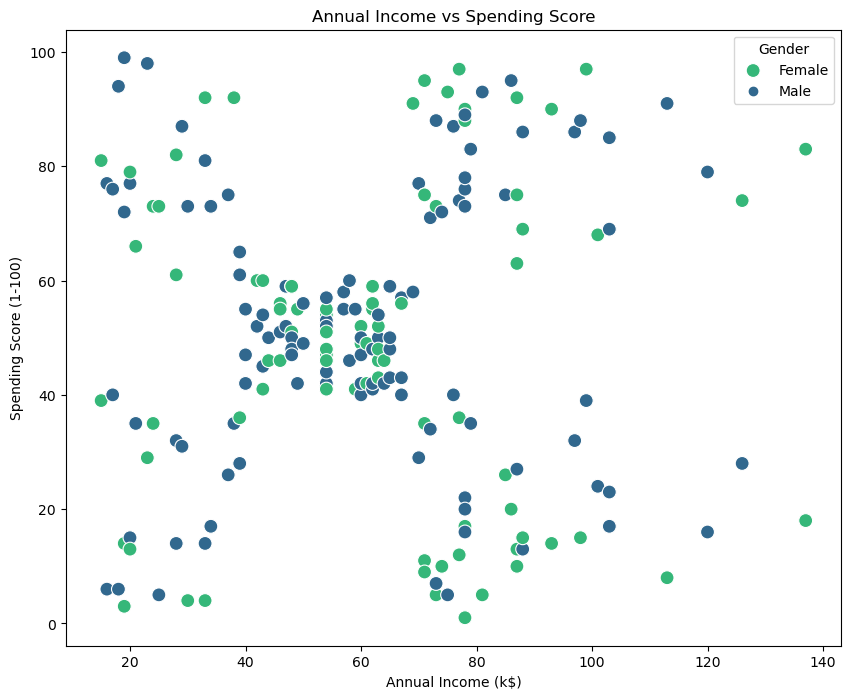

In [16]:
# Scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='viridis', s=100)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()



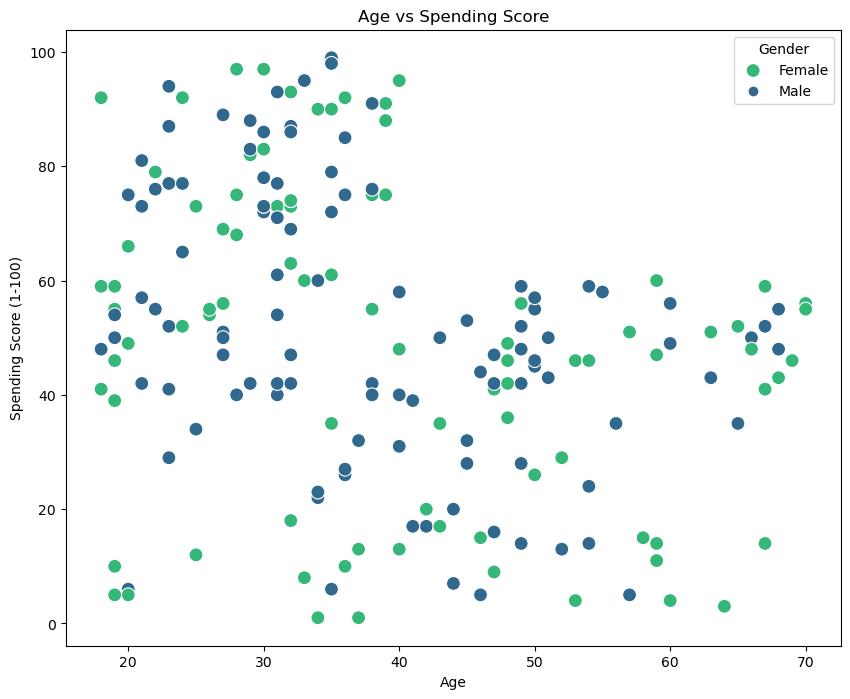

In [15]:
# Scatter plot of Age vs Spending Score
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)', hue='Gender', palette='viridis', s=100)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()



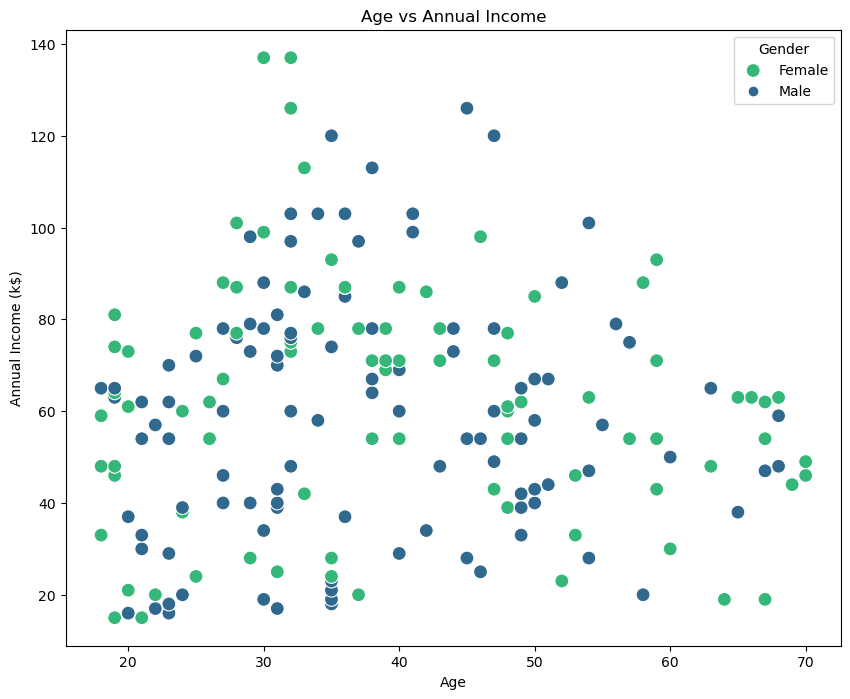

In [14]:
# Scatter plot of Age vs Annual Income
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='Age', y='Annual Income (k$)', hue='Gender', palette='viridis', s=100)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

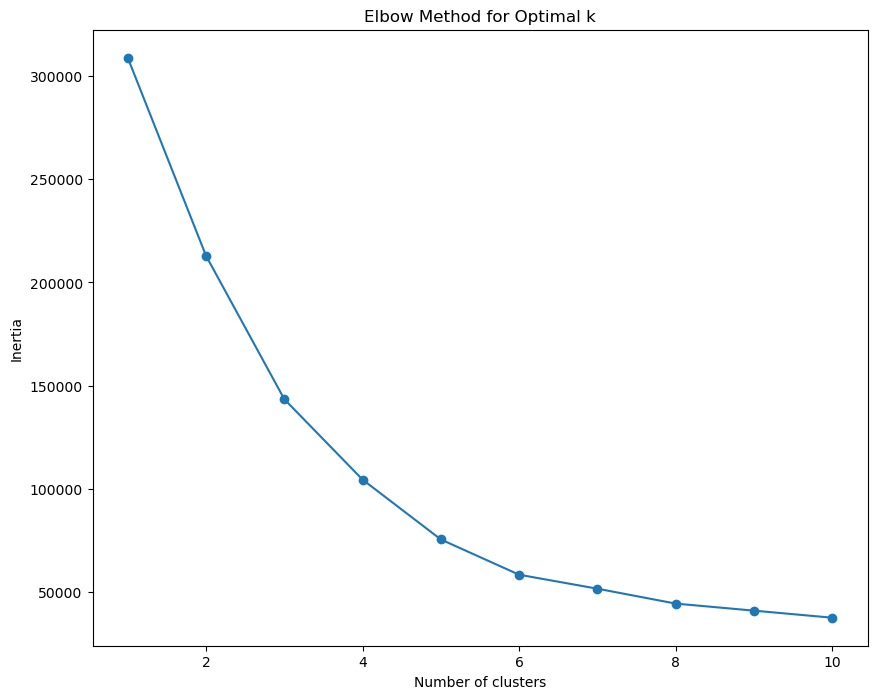

In [5]:
#determine the optimal number of clusters using the Elbow method
inertia=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10,8))
plt.plot(range(1,11),inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

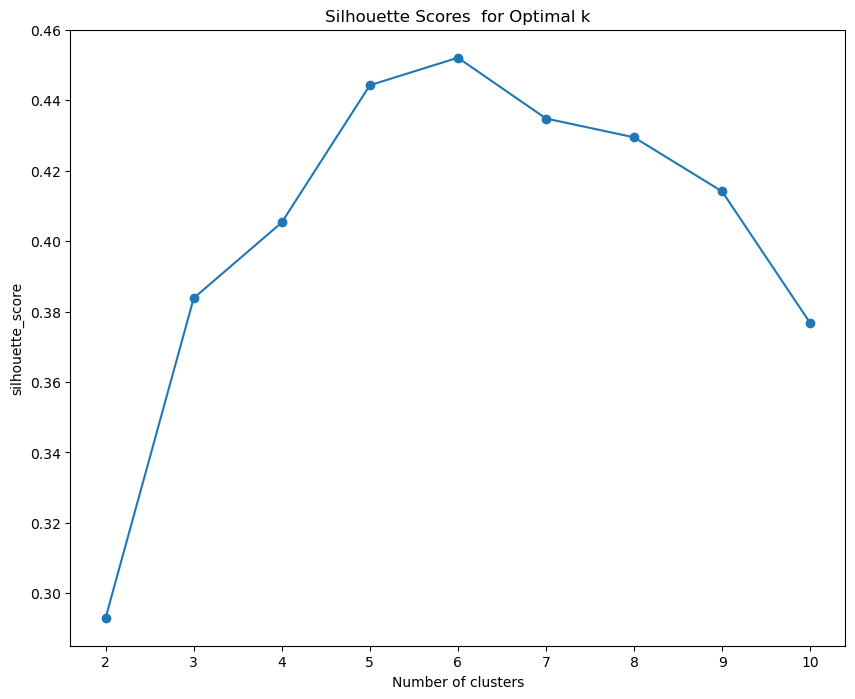

In [6]:
#determine the optimal number of clusters using the silhouette score
silhouette_scores=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)
    labels=kmeans.labels_
    silhouette_scores.append(silhouette_score(X,labels))
    
plt.figure(figsize=(10,8))
plt.plot(range(2,11),silhouette_scores,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.title('Silhouette Scores  for Optimal k')
plt.show

In [7]:
#based on elbow and silhouette scores , choose the optimal number of clusters
optimal_clusters=5

In [8]:
# perform K-means clustering with the optimal number of clusters
kmeans=KMeans(n_clusters=optimal_clusters,random_state=44)
labels=kmeans.fit_predict(X)
# add the cluster labels to the original dataset
data['Cluster']=labels
# Print the cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Gender'])
print("Cluster Centers:")
print(cluster_centers_df)

Cluster Centers:
   Annual Income (k$)  Spending Score (1-100)        Age     Gender
0            0.461538               32.692308  86.538462  82.128205
1            0.417722               43.126582  54.822785  49.835443
2            0.409091               25.272727  25.727273  79.363636
3            0.513514               40.324324  87.432432  18.189189
4            0.391304               45.217391  26.304348  20.913043



Number of Customers in Each Clusters:
1    79
0    39
3    37
4    23
2    22
Name: Cluster, dtype: int64


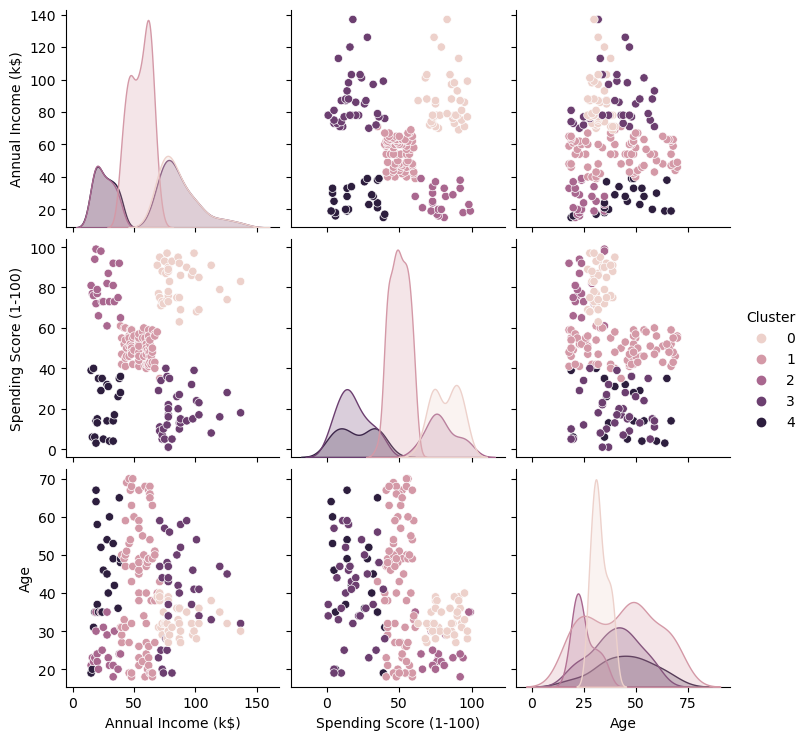

In [9]:
# print the number of customers in each cluster
print("\nNumber of Customers in Each Clusters:")
print(data['Cluster'].value_counts())
# visualize the clusters
sns.pairplot(data,hue='Cluster',diag_kind='kde',vars=['Annual Income (k$)','Spending Score (1-100)','Age'])
plt.show()

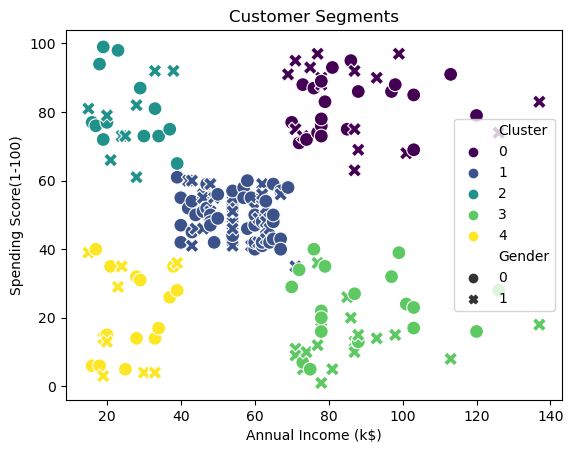

In [10]:
# visualize the clusters with Gender seperately
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)', hue='Cluster',style='Gender',palette='viridis',s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()